# Sprawozdanie 11

# Jan Izydorczyk

In [1]:
from numpy import float32,float64,log2
import sys
from matplotlib import pyplot as plt
import math
import numpy as np
import random
import scipy
import mpmath as mp
from mpmath import mpf, nstr, nprint
%matplotlib notebook

print("Wersja Pythona:")
print (sys.version)
print(f"Wersja numpy: {np.__version__}")
print("Konfiguracja liczb zmiennoprzecinkowych")
print(sys.float_info)

f64 = np.float64
f32 = np.float32

Wersja Pythona:
3.9.4 (tags/v3.9.4:1f2e308, Apr  6 2021, 13:40:21) [MSC v.1928 64 bit (AMD64)]
Wersja numpy: 1.20.2
Konfiguracja liczb zmiennoprzecinkowych
sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)


# Zadanie 1

In [2]:
def is_2pow(n):
    while n % 2 == 0:
        n //= 2
    return n == 1

In [3]:
def get_F(n):
    exponents = np.arange(0, n)
    exponents = exponents.reshape(-1, 1) * exponents.reshape(1, -1)
    return np.exp(- 2 * np.pi * 1j * exponents / n)

In [4]:
def dft_classic(x):
    n = x.shape[0]
    if not is_2pow(n):
        raise ValueError('n should be power of two')
    F = get_F(n)
    return F @ x

In [5]:
x = np.array([1, 2, 1, 2]).reshape(-1, 1)
y = dft_classic(x)

In [6]:
def idft_classic(y):
    n = y.shape[0]
    if not is_2pow(n):
        raise ValueError('n should be power of two')
    F = get_F(n)
    return np.conjugate(F @ np.conjugate(y)) / n

In [7]:
x = np.array([1, 2, 1, 2]).reshape(-1, 1)
y = dft_classic(x)
print(x)
print()
print(y)
print()
print(idft_classic(y))

[[1]
 [2]
 [1]
 [2]]

[[ 6.00000000e+00+0.00000000e+00j]
 [-1.45349435e-16+0.00000000e+00j]
 [-2.00000000e+00-7.34788079e-16j]
 [ 7.69115212e-16-4.44089210e-16j]]

[[1.-2.94719322e-16j]
 [2.-1.06151482e-16j]
 [1.+4.97899625e-17j]
 [2.+2.28616162e-16j]]


In [8]:
from scipy.fft import fft, ifft

In [9]:
x = np.array([1, 2, 1, 2])
y = np.fft.fft(x)
print(x)
print()
print(y)
print()
print(np.fft.ifft(y))

[1 2 1 2]

[ 6.+0.j  0.+0.j -2.+0.j  0.+0.j]

[1.+0.j 2.+0.j 1.+0.j 2.+0.j]


In [32]:
def dft_quick(x):
    n = x.shape[0] 
    if n == 1:
        return x.copy()
    else:
        y_left = dft_quick(x[0::2])
        y_right = dft_quick(x[1::2])
        y_right = y_right * np.exp(-2 * np.pi * 1j / n * np.arange(0, n // 2)).reshape(-1, 1)
        y_left = y_left + y_right
        y_right = y_left - 2 * y_right
        res = np.concatenate((y_left, y_right))
        return res

In [33]:
x = np.array([1, 2, 1, 2, 1, 3, 4, 5]).reshape(-1, 1)
y_classic = dft_classic(x)
y_quick = dft_quick(x)
print(x)
print()
print(y_classic)
print()
print(y_quick)
# print(idft_classic(y))

[[1]
 [2]
 [1]
 [2]
 [1]
 [3]
 [4]
 [5]]

[[19.        +0.00000000e+00j]
 [ 1.41421356+5.82842712e+00j]
 [-3.        +2.00000000e+00j]
 [-1.41421356-1.71572875e-01j]
 [-5.        -3.42901104e-15j]
 [-1.41421356+1.71572875e-01j]
 [-3.        -2.00000000e+00j]
 [ 1.41421356-5.82842712e+00j]]

[[19.        +0.j        ]
 [ 1.41421356+5.82842712j]
 [-3.        +2.j        ]
 [-1.41421356-0.17157288j]
 [-5.        +0.j        ]
 [-1.41421356+0.17157288j]
 [-3.        -2.j        ]
 [ 1.41421356-5.82842712j]]


In [12]:
a = np.zeros((2, 1))
b = np.ones((3, 1))
# print((a, b), axis=0)
print(np.concatenate((a, b)))
# np.concatenate(np.array([[1]]), np.array([[2]]))

[[0.]
 [0.]
 [1.]
 [1.]
 [1.]]


# Zadanie 2

In [13]:
def gen_signal_mixed(n, interval):
    a, b = interval
    t = np.linspace(a, b, n)
    freqs = np.random.randint(1, 15, size=8) * 2 * np.pi
    freqs = np.arange(1, 9) * 2 * np.pi
    
    sins =  np.sin( t * freqs.reshape(-1, 1) )
    return t, np.sum(sins, axis=0)

In [14]:
t, signal = gen_signal_mixed(2**10, (0, 2 * np.pi))

<IPython.core.display.Javascript object>


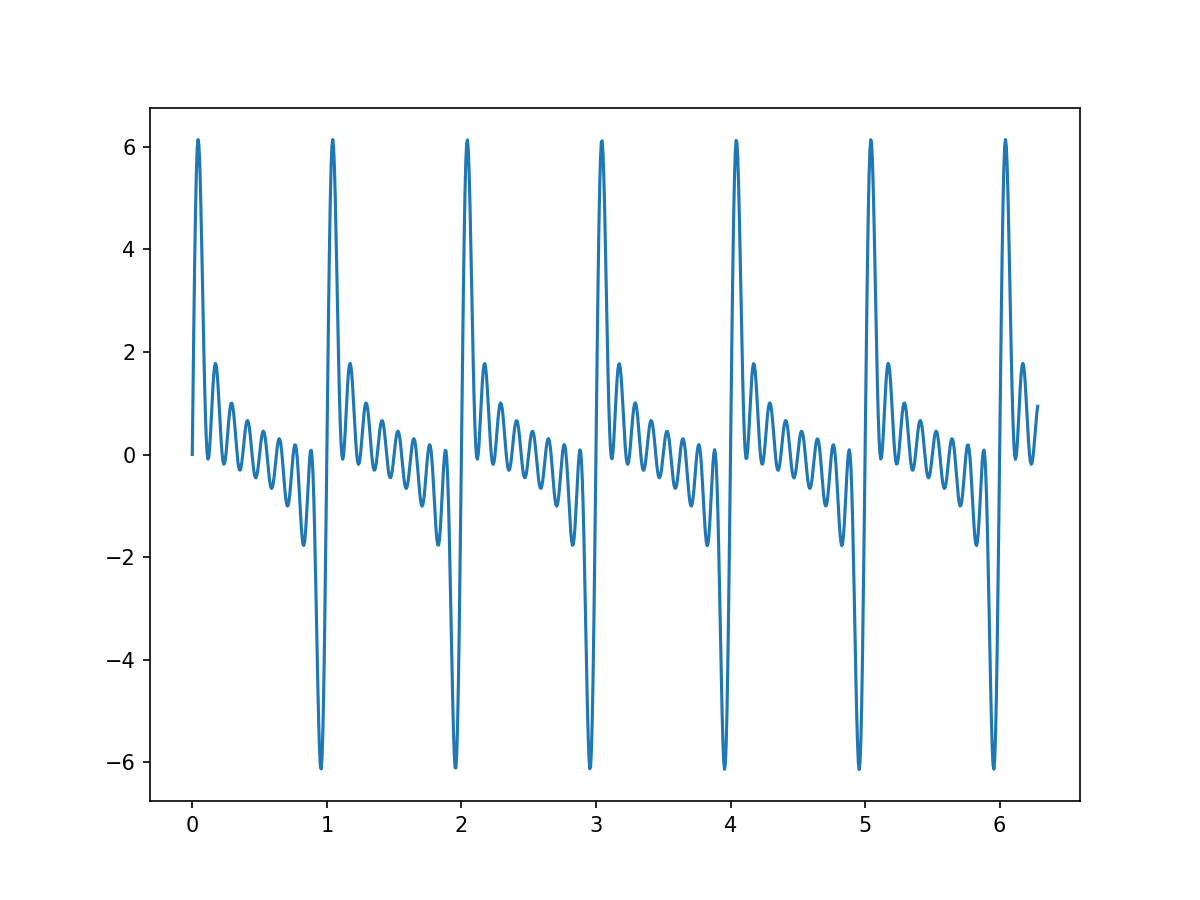

In [15]:
fig = plt.figure(figsize = (8, 6))
plt.plot(t, signal)

<IPython.core.display.Javascript object>


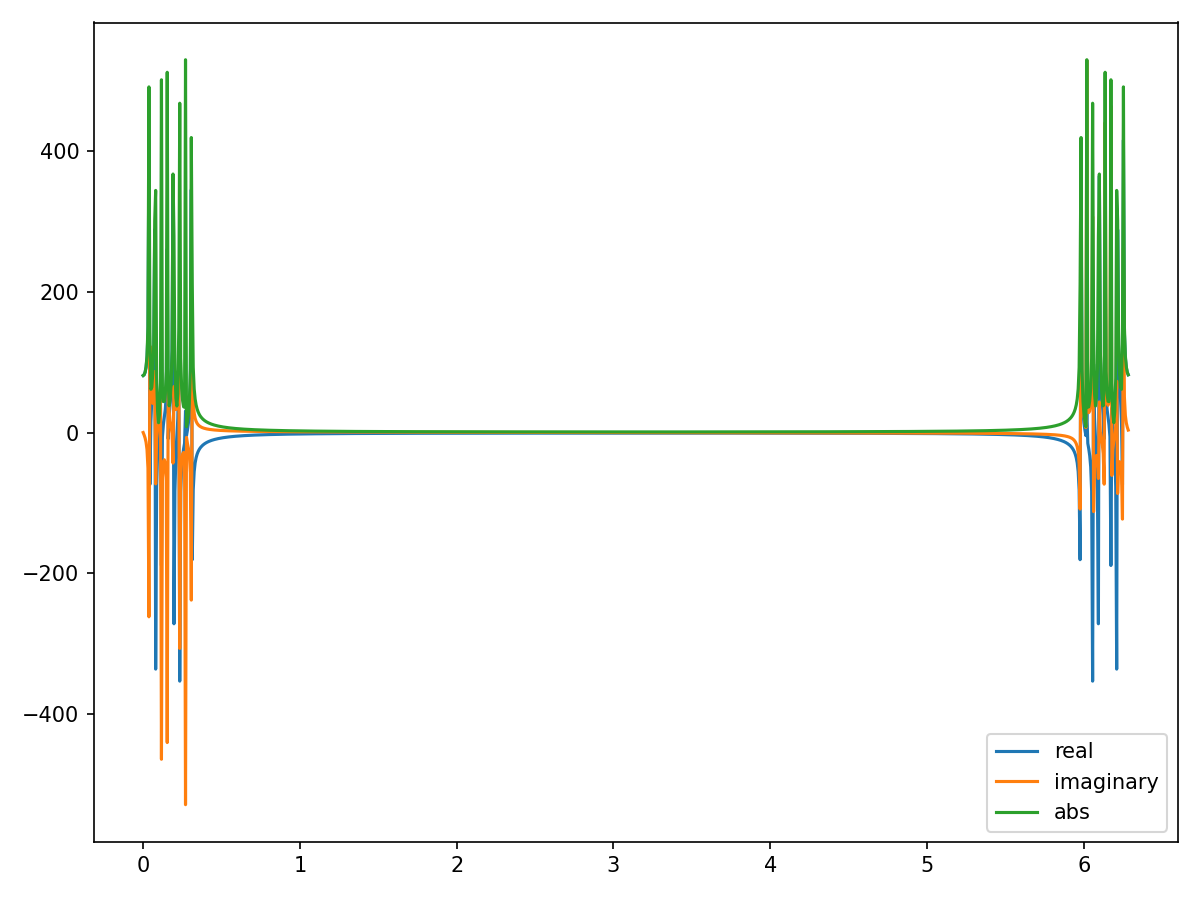

In [13]:
y = dft_classic(signal)
y_real = np.real(y)
y_imag = np.imag(y)

fig = plt.figure(figsize=(8, 6))
plt.plot(t, y_real, label='real')
plt.plot(t, y_imag, label='imaginary')
plt.plot(t, np.absolute(y), label='abs')
plt.legend()
fig.tight_layout()

In [14]:
def gen_signal_joined(n, interval):
    a, b = interval
    t = np.linspace(a, b, n)
    ts = t.reshape(8, -1)
#     print(ts)
    freqs = (np.random.randint(1, 15, size=8) * np.pi).reshape(-1, 1)
#     print(freqs.shape)
#     print(ts.shape)
    sins =  np.sin( ts * freqs )
    return t, sins.reshape(-1)

In [15]:
t, signal = gen_signal_joined(2**10, (0, 2 * np.pi))

<IPython.core.display.Javascript object>


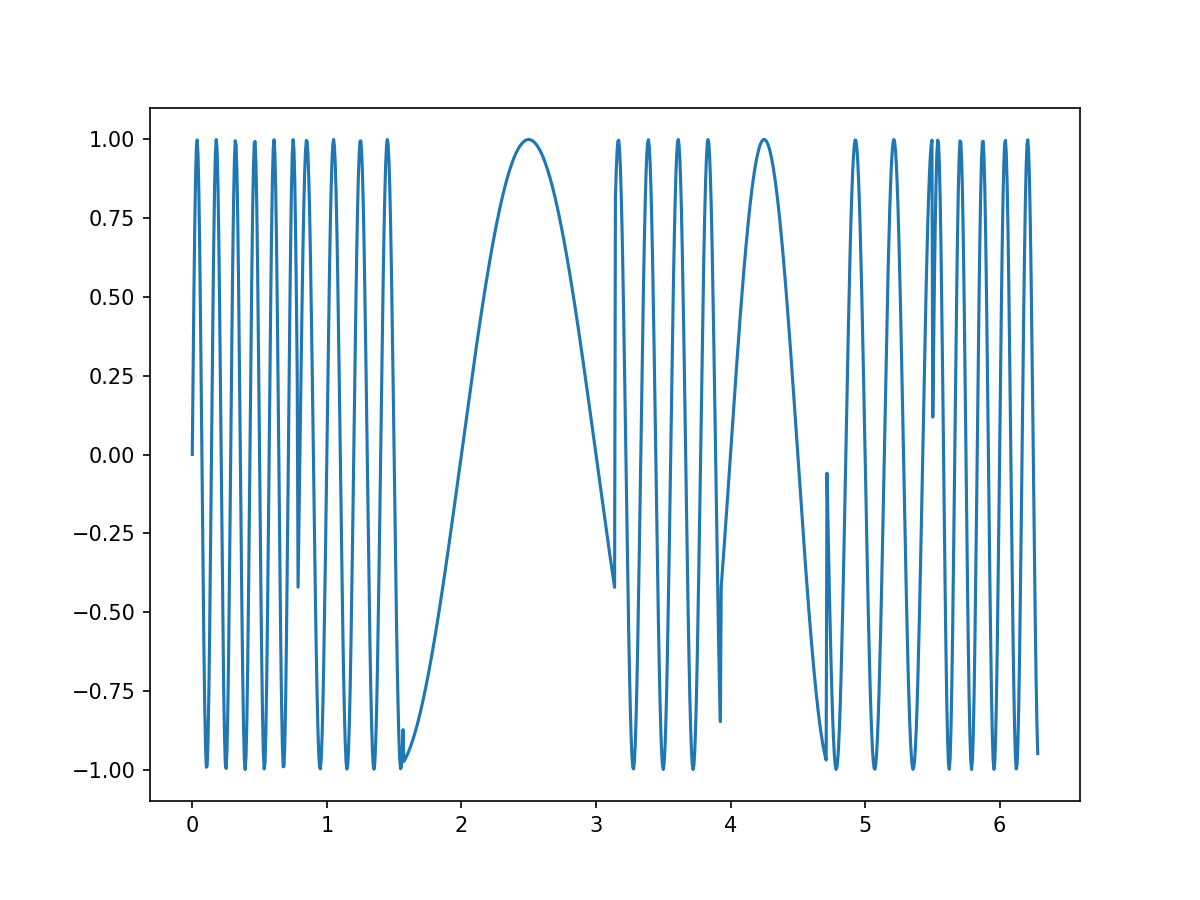

In [16]:
fig = plt.figure(figsize=(8, 6))
plt.plot(t, signal)

<IPython.core.display.Javascript object>


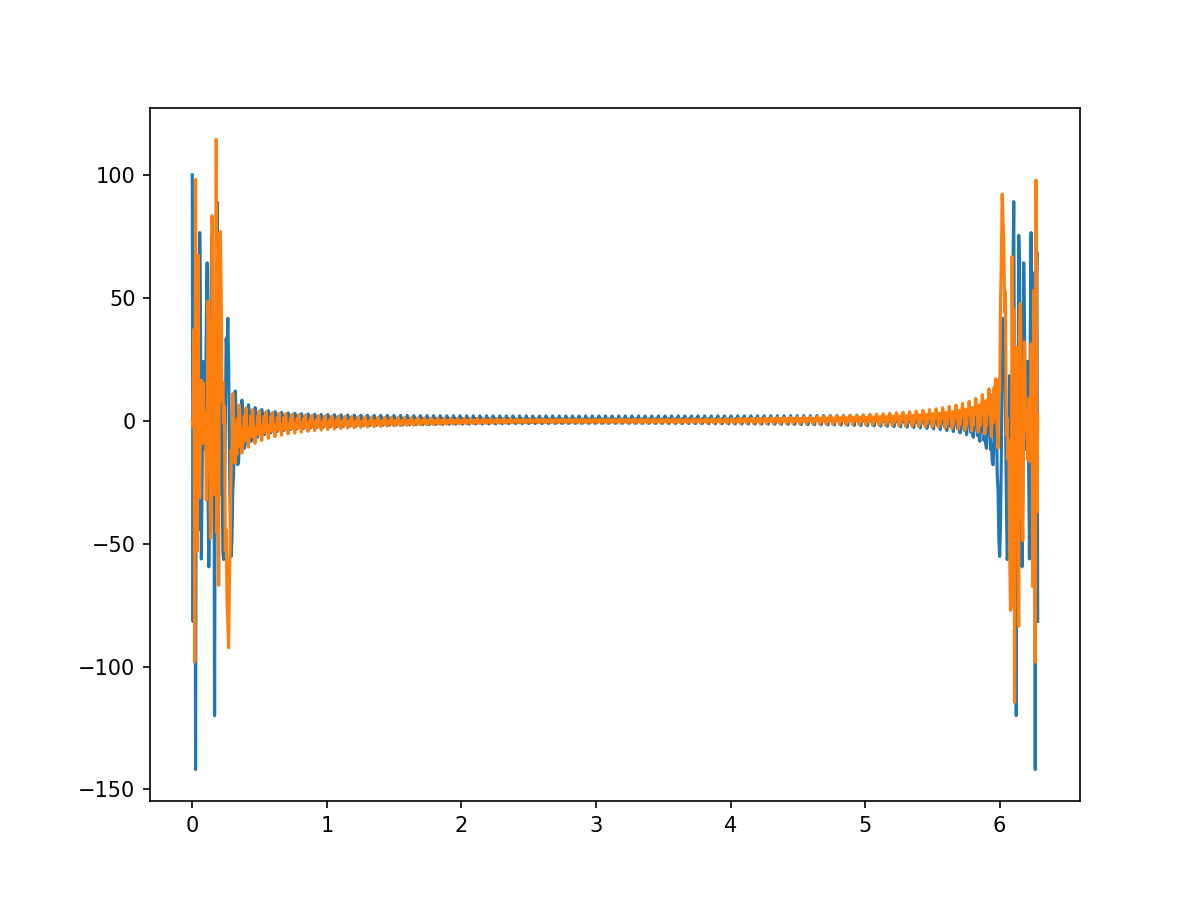

In [17]:
y = dft_classic(signal)
y_real = np.real(y)
y_imag = np.imag(y)

fig = plt.figure(figsize=(8, 6))
plt.plot(t, y_real)
plt.plot(t, y_imag)